# Energy Balances III

[What is Bond listening to right now?](https://www.youtube.com/watch?v=6zVah4ymbQo#t=2h09m45s)

This lecture continues with Energy Balance example problems.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

## Energy Balances for Ideal Reactor Archetypes in 587

### Batch Reactor

The material balance for species j in a well-mixed batch reactor is:

$$\frac{dN_j}{dt} = R_jV$$

In cases where we have either an incompressible fluid or our reactor operates at constant pressure, the energy balance on a batch reactor is:

$$\sum_j N_j C_{p,j} \frac{dT}{dt} = -\sum_i \Delta H_{i} r_i V + \dot{Q}$$

$$\dot{Q} = UA(T_a - T)$$

### CSTR

The material balance for species j in a CSTR is:

$$\frac{dN_j}{dt} = F_{jf} - F_j + R_jV$$

If we have an incompressible fluid or a reactor operating at constant pressure, the energy balance on a CSTR is:

$$\sum_j N_j \bar{C}_{p,j} \frac{dT}{dt} = -\sum_i \Delta H_{i} r_i V + \sum_j F_{jf}(H_{jf} - H_j) + \dot{Q}$$

$$\dot{Q} = UA(T_a - T)$$

### PFR

The material balance for species $j$ in a PFR is:

$$\frac{dF_j}{dV} = R_j$$

If we have an ideal gas or a reactor operating without a pressure drop, the energy balance for a PFR is:

$$\sum_j F_j C_{p,j} \frac{dT}{dV} = -\sum_i \Delta H_{i} r_i + \dot{q}$$

$$\dot{q} = Ua(T_a - T)$$

## Example Problem 01

(Fogler, Example 11.3) 
	
Normal butane, *n*-$C_4H_{10}$, is isomerized to make isobutane, *i*-$C_4H_{10}$, in the liquid-phase using a plug-flow reactor.  Isobutane is a valuable product that is used in the manufacture of gasoline additives.  For example, isobutane can be further reacted to form iso-octane, a high octane component of gasoline.

This reversible reaction follows an elementary rate law.  It is carried out adiabatically under high pressure using trace amounts of a liquid catalyst. The liquid enters the reactor at a temperature of 330K. In addition, we have determined that this reaction has a forward rate constant of 31.1 $h^{-1}$ at 360K. We further know the concentration-based equilibrium constant $(K_C)$ for this reaction is 3.03 at $60^\circ C$.

For this process, we are feeding a mixture of *n*-$C_4H_{10}$ and inert isopentane (*i*-$C_5H_{12}$)  into the reactor at a volumetric rate of 100,000 gallons per day.  This corresponds to a total molar flowrate of 163 kmol per hour.  The feed composition is 90 mol\% *n*-$C_4H_{10}$ and 10 mol\% *i*-$C_5H_{12}$.

For convenience, we'll represent the reaction as:

$$A \leftrightharpoons B$$

And use the symbol "I" to designate inert isopentane.

We are additionally given the following information about this system:

\begin{align}		
    E_{A}  &= 65.7 \ \textrm{kJ} \ \textrm{mol}^{-1}				 \\
    \Delta H_0 &= -6900 \ \textrm{J} \ \textrm{mol}^{-1}             \\ 
    C_{PA} &= 141 \ \textrm{J} \ \textrm{mol}^{-1} \ \textrm{K}^{-1} \\
    C_{PB} &= 141 \ \textrm{J} \ \textrm{mol}^{-1} \ \textrm{K}^{-1} \\
    C_{PI} &= 161 \ \textrm{J} \ \textrm{mol}^{-1} \ \textrm{K}^{-1}
\end{align}

Here, the heat of reaction ($\Delta H_0$) is measured at 333K.

**Plot the Equilibrium conversion as a function of temperature for this reaction**

### Solution to Example Problem 01

We are given a concentration based equilibrium constant here.  We know that the following is true at equilibrium:

$$K_C = \prod_j {C_j}^{\nu_j}$$

For this simple stoichiometry, that expression becomes:

$$K_C = \frac{C_B}{C_A}$$

We can express these concentrations in terms of molar and volumetric flowrates:

$$K_C = \frac{F_B/Q}{F_A/Q}$$

And we see the volumetric flowrate will cancel because this is 1:1 stoichiometry.  Expressing molar flowrates of A and B in terms of fractional conversion (mole table):

$$K_C = \frac{F_{Bf} - F_{Af}X_A}{F_{Af}(1 - X_A)}$$

In this particular example, $F_{Bf} = 0$, so:

$$K_C = \frac{F_{Af}X_A}{F_{Af}(1 - X_A)}$$

And we get a convenient cancellation of the feed molar flowrate of A to give:

$$K_C = \frac{X_A}{1 - X_A}$$

Which we can solve explicitly for $X_A$:

$$X_A = \frac{K_C}{1 + K_C}$$

The only trick here is that this expression can't be solved until we specify a temperature.  We know that $K_C = f(T)$, but we're only given $K_C$ at 333K.  In order to make the plot requested, we need a model to describe the temperature-dependence of $K_C$.  The van't Hoff equation is a good starting point:

$$\frac{d\ln{K}}{dT} = \frac{\Delta H}{RT^2}$$

This is usually going to give us a separable ODE, but we need to figure out if $\Delta H$ is a function of temperature or not prior to integration.  We know that the heat of reaction can be given as a function of temperature from the following:

$$\Delta H(T) = \Delta H^\circ + \int_{T_0}^{T} \Delta C_pdT$$

We are given enough information to evaluate this.  From the problem statment:

$$\Delta H^\circ = -6900 \ \textrm{J} \ \textrm{mol}^{-1}$$

From stoichiometry, we find:

$$\Delta C_p = C_{p,B} - C_{p,A}$$

In this example, $C_{p,B} = C_{p,A} = 141$ J/mol/K, so $\Delta C_p = 0$.  Note we do not consider the inert isopentane in calculating the $\Delta C_p$ because does not participate in the reaction (mathematically, it has a stoichiometric coefficient of 0). Therefore, $\Delta H \neq f(T)$:

$$\Delta H = \Delta H^\circ = -6900 \ \textrm{J} \ \textrm{mol}^{-1}$$

We substitute this into the van't Hoff expression:

$$\frac{d\ln{K}}{dT} = \frac{\Delta H^\circ}{RT^2}$$

Which is separable and can be integrated:

$$\int_{\ln{K_0}}^{\ln{K}}d\ln{K} = \int_{T_0}^{T}\frac{\Delta H^\circ}{RT^2}dT$$

Doing so, we get the usual form of the integrated van't Hoff expression for cases where $\Delta H \neq f(T)$:

$$K = K_0\exp\left[-\frac{\Delta H^\circ}{R}\left(\frac{1}{T} - \frac{1}{T_0}\right)\right]$$

With that, we have everything we need to plot $X_A$ vs $T$.  See below.

In [2]:
KC0 = 3.03
T0  = 333 #K
DH  = -6990 #J/mol
R   = 8.314 #J/mol/K

KC = lambda T: KC0*np.exp(-DH/R*(1/T - 1/T0))
XAEQ = lambda T: KC(T)/(1 + KC(T))
T = np.linspace(250, 650, 100)

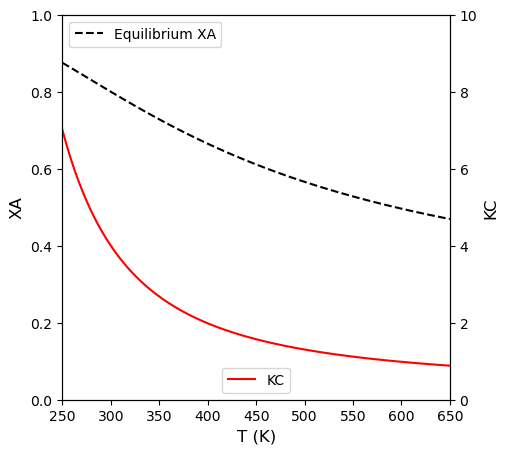

In [12]:
##Create plot with 2 yaxes to plot Conversion and KC vs. T
fig1, ax1 = plt.subplots(figsize = (5, 5))
ax2  = ax1.twinx()
ax1.plot(T, XAEQ(T), color = 'black', linestyle = 'dashed', label = 'Equilibrium XA')
ax2.plot(T, KC(T), color = 'red', label = 'KC')
ax1.set_xlim(min(T), max(T))
ax1.set_ylim(0, 1)
ax2.set_ylim(0, 10)
ax1.set_xlabel('T (K)', fontsize = 12)
ax1.set_ylabel('XA', fontsize = 12)
ax2.set_ylabel('KC', fontsize = 12)
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'lower center')
plt.show()

## Example Problem 02

For the reaction described in Problem 01, calculate the PFR volume necessary to achieve 40\% conversion of the feed.

### Solution to Example Problem 02

We begin as usual by writing a material balance on A in the PFR:

$$\frac{dF_A}{dV} = R_A$$

Where:

$$R_A = -r$$

And

$$r = k_fC_A - k_rC_B$$

We will assume constant density for this process since the density of n-butane and isobutane are very similar.  Therefore:

$$Q = Q_f$$

And:

\begin{align}
    C_A = F_A/Q \\
    C_B = F_B/Q
\end{align}

The rate constants are temperature dependent.  We are given a forward rate constant at a reference temperature of 360K, which we note is different from the reference temperature for the equilibrium constant, of 333K.  We define the forward rate constant using a van't Hoff type expression:

$$k_f = k_{f,0}\exp\left[-\frac{E_A}{R}\left(\frac{1}{T} - \frac{1}{T_{k,0}}\right)\right]$$

We proved above the the heat of reaction here is temperature independent, so we define the equilibrium constant, $K_C$ using a van't Hoff expression as we did in Part a:

$$K_C = K_{C,0}\exp\left[-\frac{\Delta H^\circ}{R}\left(\frac{1}{T} - \frac{1}{T_{K,0}}\right)\right]$$

And we define the reverse rate constant in terms of the two above:

$$k_r = \frac{k_f}{K_C}$$

Working through these definitions, it is clear that we need to write a balance on species B so that its concentration is defined during solution of the ODE system:

$$\frac{dF_B}{dV} = R_B = r$$

We also need an energy balance so that we solve for the change in temperature across the PFR volume.  For a PFR, the energy balance is:

$$\frac{dT}{dV} = \frac{-\sum_i \Delta H_i r_i + \dot{q}}{\sum_j F_j C_{p,j}}$$

We can simplify this by recognizing that the reactor is adiabatic and that it only involves one reaction:

$$\frac{dT}{dV} = \frac{\Delta H r}{\sum_j F_j C_{p,j}}$$

Where we again note that $\Delta H$ is temperature independent and that r is defined above.  The final term to fill out is the summation of flowrates.  Here, we need to consider all species flowing through the reactor.  This includes the inert isopentane.

$$\sum_j F_j C_{p,j} = F_A C_{p,A} + F_B C_{p,B} + F_I C_{p,I}$$

We do not need a complicated balance on I in this system; it does not participate in the reaction, so it's flowrate is equal to its feed flowrate.  With that, we have enough to solve the problem.

In [13]:
Tf  = 330 #K
Tk0 = 360 #K
TK0 = 333 #K
kf0 = 31.1 #1/h
KC0 = 3.03 
Q   = 100000/24 #gal/h
FTf = 163000 #mol/h
xAf = 0.9
xBf = 0.0
xIf = 0.1
EA  = 65.7e3 #J/mol
DH  = -6900 #J/mol
CPA = 141   #J/mol/K
CPB = 141   #J/mol/K
CPI = 161   #J/mol/K
R   = 8.314 #J/mol/K

FAf = xAf*FTf
FBf = xBf*FTf
FIf = xIf*FTf

In [14]:
def EB02b(V, var):
    FA = var[0] #mol/h
    FB = var[1] #mol/h
    T  = var[2] #K
    
    CA = FA/Q #mol/gal
    CB = FB/Q #mol/gal
    kf = kf0*np.exp(-EA/R*(1/T - 1/Tk0)) #1/h
    KC = KC0*np.exp(-DH/R*(1/T - 1/TK0))
    kr = kf/KC #1/h
    
    r  = kf*CA - kr*CB #mol/gal/h
    
    RA = -r #mol/gal/h
    RB =  r #mol/gal/h
    
    D1 = RA #mol/gal/h
    D2 = RB #mol/gal/h
    D3 = (-DH*r)/(FA*CPA + FB*CPB + FIf*CPI) #K/gal
    return [D1, D2, D3]

In [15]:
var0 = [FAf, FBf, Tf]
vspan = (0.0, 1000.0) #gal
ans2b = solve_ivp(EB02b, vspan, var0, atol = 1e-10, rtol = 1e-10)
V     = ans2b.t #gal
FA    = ans2b.y[0, :] #mol/h
T     = ans2b.y[2, :] #K
XA    = (FAf - FA)/FAf
itpb  = interp1d(XA, V)
solb  = itpb(0.4)

print(f'In an adiabatic PFR, we need a {solb:4.0f} gal reactor to achieve 40% conversion of A')

In an adiabatic PFR, we need a  304 gal reactor to achieve 40% conversion of A


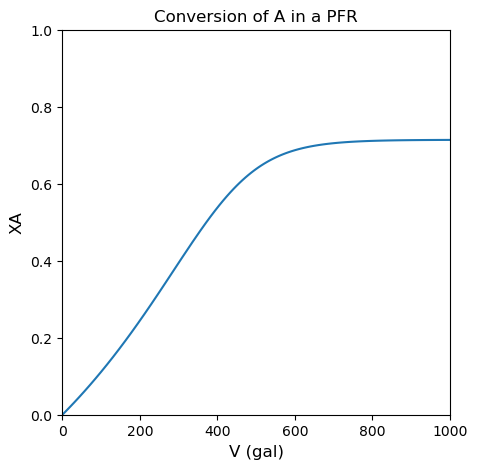

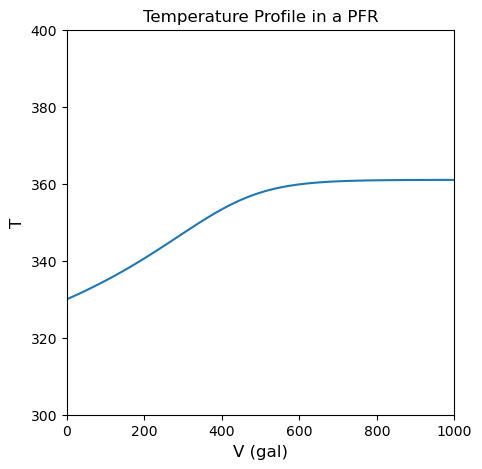

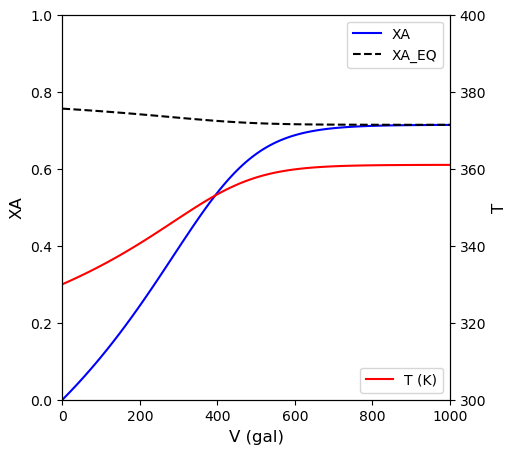

In [16]:
plt.figure(1, figsize = (5, 5))
plt.plot(V, XA)
plt.xlabel('V (gal)', fontsize = 12)
plt.ylabel('XA', fontsize = 12)
plt.xlim(0, max(vspan))
plt.ylim(0.0, 1.0)
plt.title('Conversion of A in a PFR')
plt.show()

plt.figure(2, figsize = (5, 5))
plt.plot(V, T)
plt.xlabel('V (gal)', fontsize = 12)
plt.ylabel('T', fontsize = 12)
plt.xlim(0, max(vspan))
plt.ylim(300, 400)
plt.title('Temperature Profile in a PFR')
plt.show()

##Create plot with 2 yaxes to plot XA and T vs. V
fig1, ax1 = plt.subplots(figsize = (5, 5))
ax2  = ax1.twinx()
ax1.plot(V, XA, color = 'blue', label = 'XA')
ax1.plot(V, XAEQ(T), color = 'black', linestyle = 'dashed', label = 'XA_EQ')
ax2.plot(V, T, color = 'red', label = 'T (K)')
ax1.set_xlim(0, max(V))
ax1.set_ylim(0, 1)
ax2.set_ylim(300, 400)
ax1.set_xlabel('V (gal)', fontsize = 12)
ax1.set_ylabel('XA', fontsize = 12)
ax2.set_ylabel('T', fontsize = 12)
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'lower right')
plt.show()

## Example Problem 03

For the system described in Problem 01, calculate the CSTR volume necessary to achieve 40\% conversion of the feed.

### Solution to Example Problem 03

This is conceptually similar to Part b, we're just writing balances on the CSTR instead. We know that a CSTR at steady state will result in a set of algebraic equations given by material and energy balances. When we consider non-isothermal CSTR performance, we usually get a lot of nonlinearity in these equations, so I generally try to reduce the system of equations to the smallest possible set.

Here, we'll take advantage of the fact that we know the desired exit conversion is 40%.  Therefore, we can immediately solve for the exit molar flowrates of A and B:

\begin{align}
    F_A &= F_{A,f}(1 - X_A) = 88020 \ \textrm{mol} \ \textrm{h}^{-1}\\
    F_B &= F_{A,f}X_A = 58680 \ \textrm{mol} \ \textrm{h}^{-1}
\end{align}

With that, we can write a single balance on A:

$$0 = F_{A,f} - F_A + R_AV$$

Where:

$$R_A = -r$$

and:

$$r = k_fC_A - k_rC_B$$

Concentrations are defined as usual:

$$C_j = \frac{F_j}{Q}$$

And the temperature is going to change between the inlet and outlet of the CSTR since this is an adiabatic process.  Therefore, we need to model the rate constants as functions of temperature, and we do so using the van't Hoff expressions we wrote for the PFR:

$$k_f = k_{f,0}\exp\left[-\frac{E_A}{R}\left(\frac{1}{T} - \frac{1}{T_{k,0}}\right)\right]$$

and:

$$K_C = K_{C,0}\exp\left[-\frac{\Delta H^\circ}{R}\left(\frac{1}{T} - \frac{1}{T_{K,0}}\right)\right]$$

The reverse rate constant is calculated from the above two:

$$k_r = \frac{k_f}{K_C}$$

To solve for the exit temperature from the CSTR, we need to write an energy balance.  At steady state, the CSTR balance is:

$$0 = -\sum_i \Delta H_i r_i V + \sum_j F_{j,f}(H_{j,f} - H_j) + \dot{Q}$$

Simplifying for a single reaction and an adiabatic process:

$$0 = -\Delta H r V + \sum_j F_{j,f}(H_{j,f} - H_j)$$

We've already proven that the heat of reaction is constant for this example, so:

$$\Delta H = \Delta H^\circ$$

The rate of reaction is described above.  The summation term requires a bit of expansion. Note that it only considers inlet flowrates.

$$\sum_j F_{j,f}(H_{j,f} - H_j) = F_{A,f}(H_{A,f} - H_A) + F_{B,f}(H_{B,f} - H_B) + F_{I,f}(H_{I,f} - H_I)$$

We are not given enthalpies for any of these species, but we are given heat capacities.  Generally speaking:

$$H_j(T) = H_j^\circ + \int_{T_0}^{T} C_{p,j} dT$$

For the case of constant heat capacities, which we have here:

$$H_j(T) = H_j^\circ + C_{p,j}(T - T_0)$$

We are interested in the molar enthalpies of species $j$ at feed conditions ($H_{j,f}$) and at exit conditions ($H_j$). The feed enthalpy can be described as:

$$H_{j,f} = H_j^\circ + C_{p,j}(T_f - T_0)$$

and the exit enthalpy can be described as:

$$H_{j} = H_j^\circ + C_{p,j}(T - T_0)$$

We do not know the reference enthalpy for species j, nor the reference temperature where it is measured; however, because we are only interested in the difference in enthalpy, we can cancel these terms.  Specifically:

$$H_{j,f} - H_j = H_j^\circ + C_{p,j}(T_f - T_0) - H_j^\circ - C_{p,j}(T - T_0)$$

Distributing heat capacities:

$$H_{j,f} - H_j = H_j^\circ + C_{p,j}T_f - C_{p,j}T_0 - H_j^\circ - C_{p,j}T + C_{p,j}T_0$$

You see a cancellation of unknown terms to get:

$$H_{j,f} - H_j = C_{p,j}(T_f - T)$$

So we can replace the summation above with:

$$\sum_j F_{j,f}(H_{j,f} - H_j) = F_{A,f}C_{p,A}(T_f - T) +  F_{B,f}C_{p,B}(T_f - T) +  F_{I,f}C_{p,I}(T_f - T)$$

With this, we have to solve two equations (EB and MB on A) in two unknowns.  Everything on the right hand side of the EB and MB are expressed in terms of constants and our two unknowns $(T, V)$.

In [17]:
XAout = 0.4
FAout = FAf*(1 - XAout)
FBout = FAf*XAout

In [18]:
def EB02c(var):
    V = var[0] #gal
    T = var[1] #K
    
    CA = FAout/Q #mol/gal
    CB = FBout/Q #mol/gal
    
    kf = kf0*np.exp(-EA/R*(1/T - 1/Tk0)) #1/h
    KC = KC0*np.exp(-DH/R*(1/T - 1/TK0)) 
    kr = kf/KC #1/h
    
    r  = kf*CA - kr*CB #mol/gal/h
    
    RA = -r #mol/gal/h
    
    F1 = FAf - FAout + RA*V #mol/h
    F2 = -DH*r*V + FAf*CPA*(Tf - T) + FBf*CPB*(Tf - T) + FIf*CPI*(Tf - T) #J/h
    return [F1, F2]

In [19]:
var0 = [250, 350]
solc = opt.root(EB02c, var0)
V, T = solc.x
print(f'The CSTR operates at {T:3.0f}K and requires a volume of {V:3.0f} gallons to achieve 40% conversion')

The CSTR operates at 347K and requires a volume of 262 gallons to achieve 40% conversion


## Example Problem 04

Interpret the reactor sizing results

### Solution to Example Problem 04

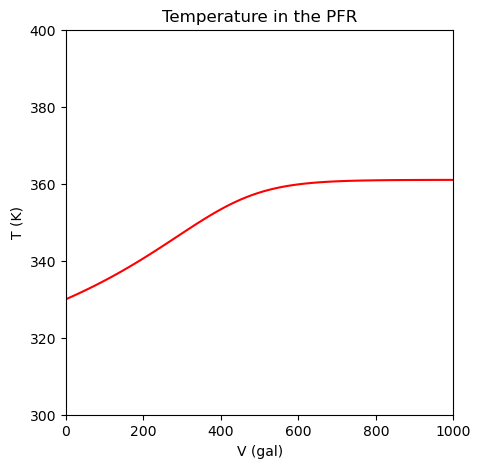

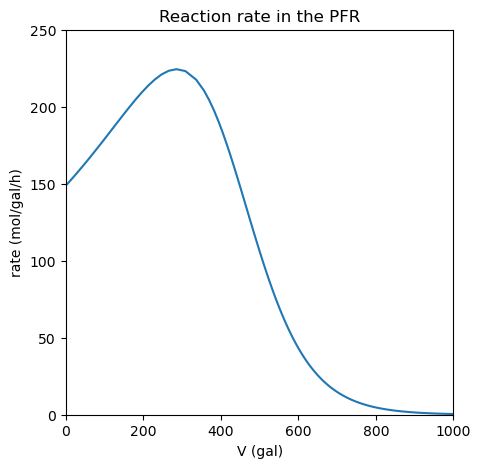

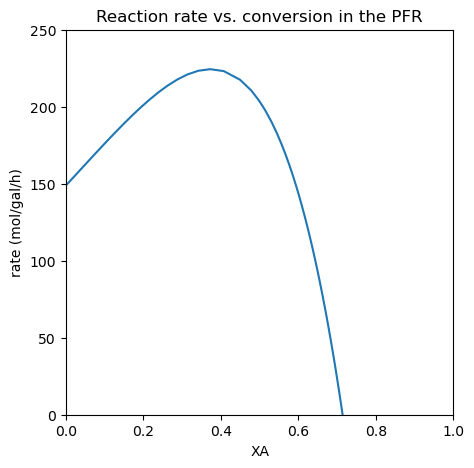

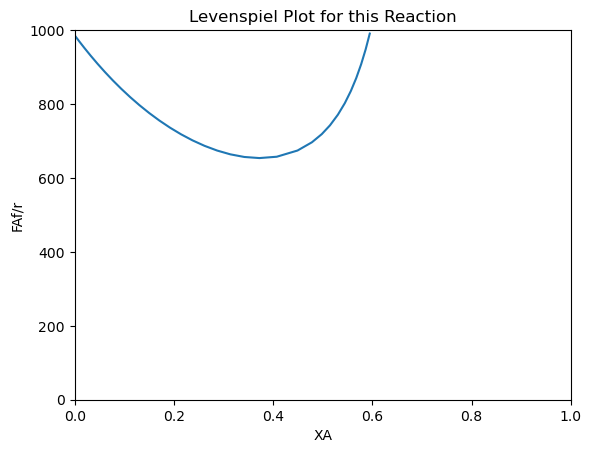

In [20]:
#Processing data from the PFR for a bit more insight

kffun = lambda T: kf0*np.exp(-EA/R*(1/T - 1/Tk0))
KCfun = lambda T: KC0*np.exp(-DH/R*(1/T - 1/TK0))
XAfun = lambda T: KCfun(T)/(1 + KCfun(T))

V  = ans2b.t
FA = ans2b.y[0,:]
FB = ans2b.y[1,:]
T  = ans2b.y[2,:]
CA = FA/Q
CB = FB/Q
kf = kffun(T)
KC = KCfun(T)
kr = kf/KC
r  = kf*CA - kr*CB
Xe = KC/(1 + KC)

plt.figure(1, figsize = (5, 5))
plt.plot(V, T, color = 'red')
plt.xlabel('V (gal)')
plt.ylabel('T (K)')
plt.xlim(0, max(vspan))
plt.ylim(300, 400)
plt.title('Temperature in the PFR')
plt.show()

plt.figure(2, figsize = (5, 5))
plt.plot(V, r)
plt.xlabel('V (gal)')
plt.ylabel('rate (mol/gal/h)')
plt.xlim(0, max(vspan))
plt.ylim(0, 250)
plt.title('Reaction rate in the PFR')
plt.show()

plt.figure(3, figsize = (5, 5))
plt.plot(XA, r)
plt.xlabel('XA')
plt.ylabel('rate (mol/gal/h)')
plt.xlim(0, 1.0)
plt.ylim(0, 250)
plt.title('Reaction rate vs. conversion in the PFR')
plt.show()

index = XA < 0.6

plt.figure(5)
plt.plot(XA[index], FAf/r[index])
plt.xlabel('XA')
plt.ylabel('FAf/r')
plt.xlim(0, 1.0)
plt.ylim(0.0, 1000)
plt.title('Levenspiel Plot for this Reaction')
plt.show()